In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("salida2.csv")
df_grouped = df.groupby(['Procesador','Chunk'])[["tCalculo", "tSync", "tComm"]].mean().reset_index()
df_grouped

,Procesador,Chunk,tCalculo,tSync,tComm
0,0,1000.0,1.356377,0.004088,0.000165
1,0,10000.0,1.286907,0.011687,0.000121
2,0,100000.0,1.263617,0.047156,0.000099
3,0,1000000.0,1.406792,0.204222,0.000030
4,0,2000000.0,1.928025,0.000024,0.000185
5,1,1000.0,1.358206,0.002186,0.000010
6,1,10000.0,1.293565,0.005286,0.000007
7,1,100000.0,1.280919,0.029939,0.000007
8,1,1000000.0,1.610971,0.000018,0.000006
9,1,2000000.0,0.880093,1.048142,0.000006


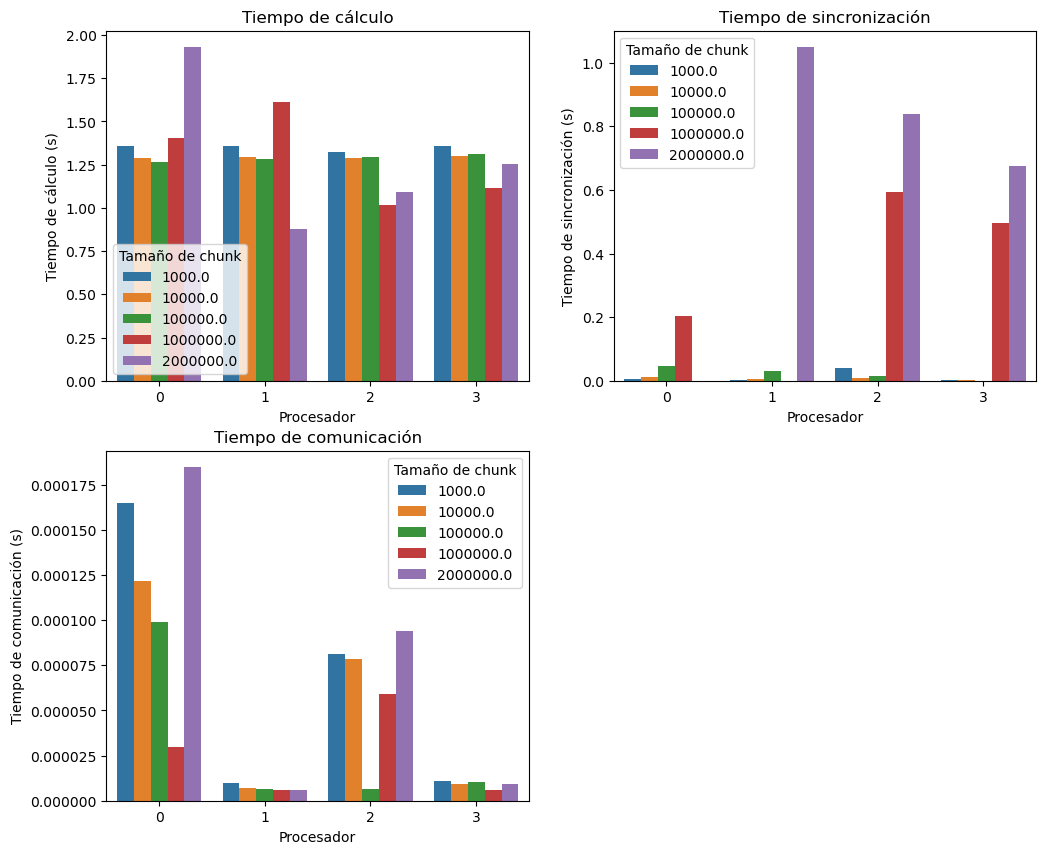

In [8]:
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.title("Tiempo de cálculo")
sns.barplot(df_grouped, x="Procesador", y="tCalculo", hue="Chunk")
plt.legend(title="Tamaño de chunk", loc="lower left")
plt.ylabel("Tiempo de cálculo (s)")
plt.subplot(222)
plt.title("Tiempo de sincronización")
sns.barplot(df_grouped, x="Procesador", y="tSync", hue="Chunk")
plt.legend(title="Tamaño de chunk")
plt.ylabel("Tiempo de sincronización (s)")
plt.subplot(223)
plt.title("Tiempo de comunicación")
sns.barplot(df_grouped, x="Procesador", y="tComm", hue="Chunk")
plt.legend(title="Tamaño de chunk")
plt.ylabel("Tiempo de comunicación (s)")
plt.savefig("imgs/salida1.png", dpi=600)
plt.show()

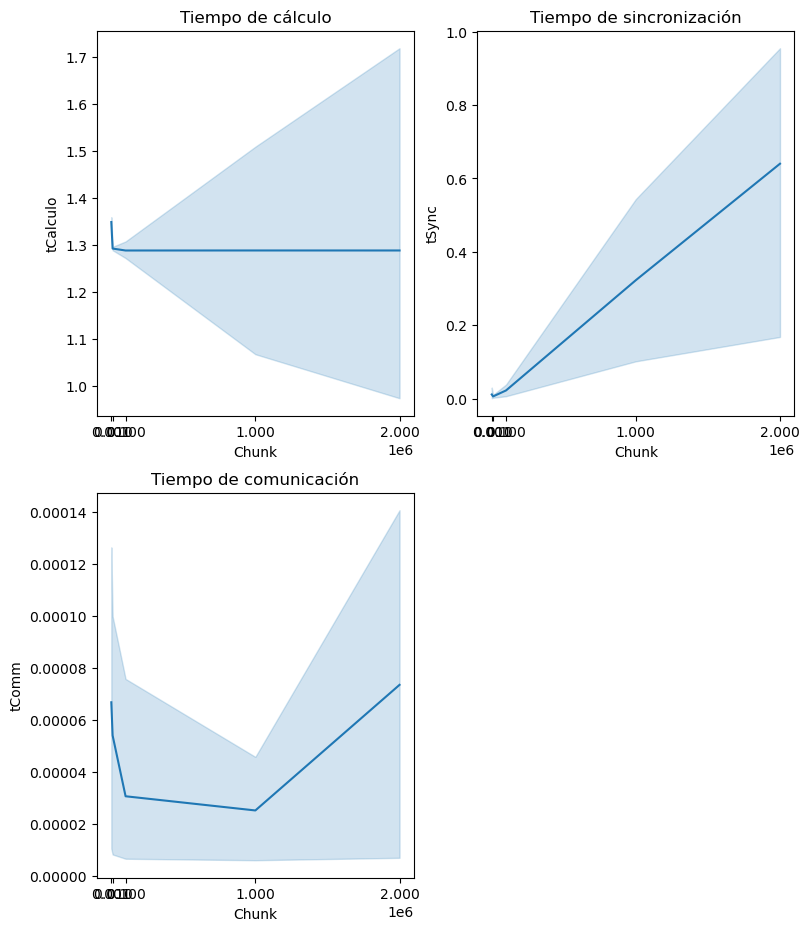

In [9]:
plt.figure(figsize=(9, 11))
plt.subplot(221)
plt.title("Tiempo de cálculo")
sns.lineplot(df_grouped, x="Chunk", y="tCalculo")
plt.xticks(df_grouped["Chunk"].unique())
plt.subplot(222)
plt.title("Tiempo de sincronización")
sns.lineplot(df_grouped, x="Chunk", y="tSync")
plt.xticks(df_grouped["Chunk"].unique())
plt.subplot(223)
plt.title("Tiempo de comunicación")
sns.lineplot(df_grouped, x="Chunk", y="tComm")
plt.xticks(df_grouped["Chunk"].unique())
plt.savefig("imgs/salida2.png", dpi=600)
plt.show()

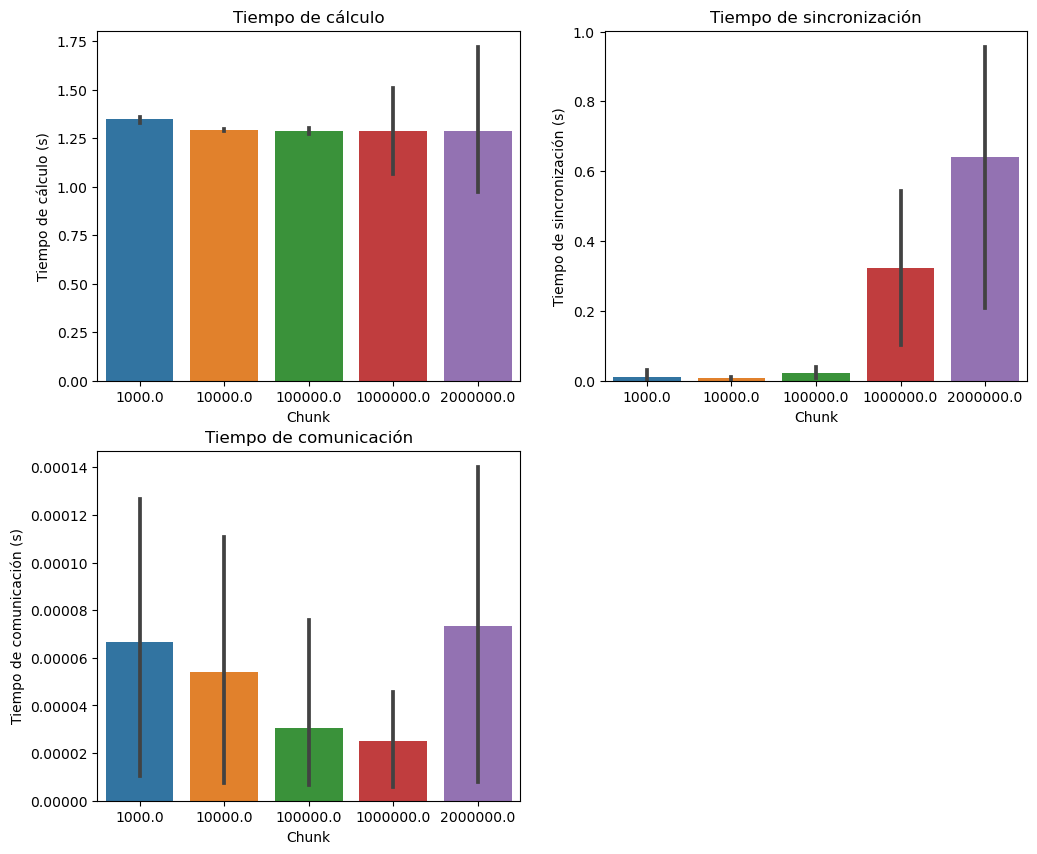

In [10]:
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.title("Tiempo de cálculo")
sns.barplot(df_grouped, x="Chunk", y="tCalculo")
plt.ylabel("Tiempo de cálculo (s)")
plt.subplot(222)
plt.title("Tiempo de sincronización")
sns.barplot(df_grouped, x="Chunk", y="tSync")
plt.ylabel("Tiempo de sincronización (s)")
plt.subplot(223)
plt.title("Tiempo de comunicación")
sns.barplot(df_grouped, x="Chunk", y="tComm")
plt.ylabel("Tiempo de comunicación (s)")
plt.savefig("imgs/salida2.png", dpi=600)
plt.show()